# Introduction to pandas

**pandas** is a Python library for analyzing and wrangling tabular data. It's probably the most common library for working with both big and small datasets in Python, and is the basis for working with more analytical packages (e.g. scikit-learn) and analyzing geographic data (e.g. geopandas)

In [15]:
# import pandas library
import pandas as pd

## Data Wrangling

Data wrangling is the process of preparing raw/imported data to a format that is suitable for use. How you wrangle data is dependent on what you want to use the data for. Generally, data wrangling comprises of exploring then reshaping your data. <br>

For this demonstration, we will use a [dataset that gives the locations and information about EarlyOn Child and family centres in Toronto](https://open.toronto.ca/dataset/earlyon-child-and-family-centres/). The data was published by the Children's Services department of the City of Toronto. I accessed and downloaded this data from the Toronto Open Data portal. The city gave this a data quality score of gold, but we still have to wrangle it to use it in a way that makes sense for us.

In [16]:
#load in the data
earlyON_raw = pd.read_csv('EarlyON.csv')

#check that it loaded
earlyON_raw.head()

,_id,service_system_manager,agency,loc_id,program_name,languages,french_language_program,indigenous_program,programTypes,serviceName,...,email,contact_fullname,contact_title,phone,contact_email,dropinHours,registeredHours,virtualHours,geometry,centre_type
0,1,City of Toronto,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,Drop-in,...,Shani.Halfon@toronto.ca,Maleda Mulu,PROGRAM MANAGER,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,Thursday: 9:00 a.m. - 11:30 a.m.,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre
1,2,City of Toronto,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,DIRECTOR OF COMMUNITY PROGRAMS,647-438-0038,angelael@westnh.org,NaN,NaN,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre
2,3,City of Toronto,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Jene.Gordon@toronto.ca,Jesmin Habib,SITE SUPERVISOR,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,Monday: 10:00 a.m. - 11:00 a.m. ; 1:00 p.m. -...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre
3,4,City of Toronto,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,URSULA.LIPSKI@toronto.ca,Julia Weglorz,SUPERVISOR,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,Tuesday: 10:00 a.m. - noon | Thursday: 10:00...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre
4,5,City of Toronto,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Shani.Halfon@toronto.ca,Maleda Mulu,PROGRAM MANAGER,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre


### Exploring data

In [17]:
#examine column names
list(earlyON_raw)

['_id',
 'service_system_manager',
 'agency',
 'loc_id',
 'program_name',
 'languages',
 'french_language_program',
 'indigenous_program',
 'programTypes',
 'serviceName',
 'buildingName',
 'address',
 'full_address',
 'major_intersection',
 'ward',
 'ward_name',
 'located_in_school',
 'school_name',
 'lat',
 'lng',
 'website',
 'website_name',
 'website_description',
 'consultant_fullname',
 'consultant_phone',
 'email',
 'contact_fullname',
 'contact_title',
 'phone',
 'contact_email',
 'dropinHours',
 'registeredHours',
 'virtualHours',
 'geometry',
 'centre_type']

In [18]:
# examine data dimensions
earlyON_raw.shape

(254, 35)

In [19]:
#check for null data
earlyON_raw.isnull().sum()

_id                          0
service_system_manager       0
agency                       0
loc_id                       0
program_name                 0
languages                  228
french_language_program    251
indigenous_program         238
programTypes               251
serviceName                253
buildingName                73
address                      0
full_address                 0
major_intersection         211
ward                         0
ward_name                    0
located_in_school            0
school_name                138
lat                          0
lng                          0
website                     68
website_name                 0
website_description          0
consultant_fullname          0
consultant_phone             0
email                        0
contact_fullname             4
contact_title              103
phone                        4
contact_email                4
dropinHours                 28
registeredHours            190
virtualH

In [20]:
#check for specific null entries
earlyON_raw[earlyON_raw('contact_fullname').isnull()]

#Google this error together

TypeError: 'DataFrame' object is not callable

In [21]:
#get rid of rows that don't have sufficient information 
df = earlyON_raw.drop(earlyON_raw.index[[112, 113, 114, 242]])
df[df['contact_fullname'].isnull()]

,_id,service_system_manager,agency,loc_id,program_name,languages,french_language_program,indigenous_program,programTypes,serviceName,...,email,contact_fullname,contact_title,phone,contact_email,dropinHours,registeredHours,virtualHours,geometry,centre_type


In [22]:
# get rid of columns that have unsufficient/irrelevant information
df.drop(columns = ['languages', 
                         'french_language_program',
                        'indigenous_program',
                        'programTypes',
                        'serviceName',
                        'major_intersection',
                        'contact_title',
                        'registeredHours',
                        'virtualHours',
                       'service_system_manager'],
            inplace = True)

df.head()
#any more that you feel like we can drop?

,_id,agency,loc_id,program_name,buildingName,address,full_address,ward,ward_name,located_in_school,...,website_description,consultant_fullname,consultant_phone,email,contact_fullname,phone,contact_email,dropinHours,geometry,centre_type
0,1,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,Toronto Kiwanis Boys & Girls Clubs,101 Spruce St,"101 Spruce St, Toronto, ON M5A 2J3",13,TORONTO CENTRE,No,...,Website for Agency Regent Park Community Heal...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre
1,2,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,1033 King St W,"1033 King St W, Toronto, ON M6K 3N3",10,SPADINA-FORT YORK,No,...,Website for Agency West Neighbourhood House O...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,647-438-0038,angelael@westnh.org,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre
2,3,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,2330 Midland Ave,"2330 Midland Ave, Scarborough, ON M1S 5G5",22,SCARBOROUGH-AGINCOURT,No,...,Website for Agency West Scarborough Neighbour...,Jene Gordon,416-397-0998,Jene.Gordon@toronto.ca,Jesmin Habib,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre
3,4,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,2700 Dufferin St,"2700 Dufferin St, York, ON M6B 4J3",8,EGLINTON-LAWRENCE,No,...,Website for Agency Macaulay Child Development...,Ursula Lipski,416-397-5210,URSULA.LIPSKI@toronto.ca,Julia Weglorz,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre
4,5,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,38 Regent St,"38 Regent St, Toronto, ON M5A 3N7",13,TORONTO CENTRE,No,...,Website for Agency Regent Park Community Heal...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre


In [23]:
# rename columns if needed
df.rename(columns = {'contact_fullname' : 'POC'}, inplace = True)
df.head()

,_id,agency,loc_id,program_name,buildingName,address,full_address,ward,ward_name,located_in_school,...,website_description,consultant_fullname,consultant_phone,email,POC,phone,contact_email,dropinHours,geometry,centre_type
0,1,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,Toronto Kiwanis Boys & Girls Clubs,101 Spruce St,"101 Spruce St, Toronto, ON M5A 2J3",13,TORONTO CENTRE,No,...,Website for Agency Regent Park Community Heal...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre
1,2,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,1033 King St W,"1033 King St W, Toronto, ON M6K 3N3",10,SPADINA-FORT YORK,No,...,Website for Agency West Neighbourhood House O...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,647-438-0038,angelael@westnh.org,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre
2,3,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,2330 Midland Ave,"2330 Midland Ave, Scarborough, ON M1S 5G5",22,SCARBOROUGH-AGINCOURT,No,...,Website for Agency West Scarborough Neighbour...,Jene Gordon,416-397-0998,Jene.Gordon@toronto.ca,Jesmin Habib,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre
3,4,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,2700 Dufferin St,"2700 Dufferin St, York, ON M6B 4J3",8,EGLINTON-LAWRENCE,No,...,Website for Agency Macaulay Child Development...,Ursula Lipski,416-397-5210,URSULA.LIPSKI@toronto.ca,Julia Weglorz,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre
4,5,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,38 Regent St,"38 Regent St, Toronto, ON M5A 3N7",13,TORONTO CENTRE,No,...,Website for Agency Regent Park Community Heal...,Shani Halfon,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre


In [24]:
#examine column data types
df.dtypes

_id                      int64
agency                  object
loc_id                   int64
program_name            object
buildingName            object
address                 object
full_address            object
ward                     int64
ward_name               object
located_in_school       object
school_name             object
lat                    float64
lng                    float64
website                 object
website_name            object
website_description     object
consultant_fullname     object
consultant_phone        object
email                   object
POC                     object
phone                   object
contact_email           object
dropinHours             object
geometry                object
centre_type             object
dtype: object

### Reshape data

Now we have an understanding of what we are working with and have made superficial changes that makes the data easier to work with, but we still have yet to examine and change (if needed) the actual data.

In [25]:
# change column data type
df['loc_id'] = df['loc_id'].astype(str)
df['ward'] = df['ward'].astype(str)
df['_id'] = df['_id'].astype(float)

df.dtypes

_id                    float64
agency                  object
loc_id                  object
program_name            object
buildingName            object
address                 object
full_address            object
ward                    object
ward_name               object
located_in_school       object
school_name             object
lat                    float64
lng                    float64
website                 object
website_name            object
website_description     object
consultant_fullname     object
consultant_phone        object
email                   object
POC                     object
phone                   object
contact_email           object
dropinHours             object
geometry                object
centre_type             object
dtype: object

In [26]:
# Make new column
df.reset_index(inplace = True)

for i in range(len(df)):
    df.loc[i, 'area_code'] = df['phone'][i][:3]
    df.loc[i, 'org'] = df['contact_email'][i].split("@")[1]
    
df.head()

,index,_id,agency,loc_id,program_name,buildingName,address,full_address,ward,ward_name,...,consultant_phone,email,POC,phone,contact_email,dropinHours,geometry,centre_type,area_code,org
0,0,1.0,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,Toronto Kiwanis Boys & Girls Clubs,101 Spruce St,"101 Spruce St, Toronto, ON M5A 2J3",13,TORONTO CENTRE,...,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre,416,regentparkchc.org
1,1,2.0,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,1033 King St W,"1033 King St W, Toronto, ON M6K 3N3",10,SPADINA-FORT YORK,...,416-397-9931,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,647-438-0038,angelael@westnh.org,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre,647,westnh.org
2,2,3.0,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,2330 Midland Ave,"2330 Midland Ave, Scarborough, ON M1S 5G5",22,SCARBOROUGH-AGINCOURT,...,416-397-0998,Jene.Gordon@toronto.ca,Jesmin Habib,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre,416,wsncc.org
3,3,4.0,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,2700 Dufferin St,"2700 Dufferin St, York, ON M6B 4J3",8,EGLINTON-LAWRENCE,...,416-397-5210,URSULA.LIPSKI@toronto.ca,Julia Weglorz,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre,416,macaulaycentres.org
4,4,5.0,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,38 Regent St,"38 Regent St, Toronto, ON M5A 3N7",13,TORONTO CENTRE,...,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre,416,regentparkchc.org


In [27]:
#drop extra columns
df.drop(columns = ["index", '_id'], inplace = True)

In [28]:
# aggregate data by area code
df.groupby("area_code").size().reset_index(name='count')

,area_code,count
0,289,2
1,416,240
2,647,8


In [29]:
# aggregate data by organization
df.groupby("org").size().reset_index(name='count').sort_values('count', ascending = False)

,org,count
44,tdsb.on.ca,75
43,tcdsb.org,19
30,mfrc.org,14
33,ncct.on.ca,11
28,macaulaycentres.org,9
13,cmcp.ca,7
26,lampchc.org,7
19,esbgc.ca,7
7,braeburn.net,5
1,agincourtcommunityservices.com,5


Now, we have an understanding of what our dataset contains, the data types in the dataset. We also changed the dataset to make it easy for us to use and generated our own columns. Let's compare where we started...

In [30]:
earlyON_raw.head()

,_id,service_system_manager,agency,loc_id,program_name,languages,french_language_program,indigenous_program,programTypes,serviceName,...,email,contact_fullname,contact_title,phone,contact_email,dropinHours,registeredHours,virtualHours,geometry,centre_type
0,1,City of Toronto,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,Drop-in,...,Shani.Halfon@toronto.ca,Maleda Mulu,PROGRAM MANAGER,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,Thursday: 9:00 a.m. - 11:30 a.m.,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre
1,2,City of Toronto,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,DIRECTOR OF COMMUNITY PROGRAMS,647-438-0038,angelael@westnh.org,NaN,NaN,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre
2,3,City of Toronto,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Jene.Gordon@toronto.ca,Jesmin Habib,SITE SUPERVISOR,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,Monday: 10:00 a.m. - 11:00 a.m. ; 1:00 p.m. -...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre
3,4,City of Toronto,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,URSULA.LIPSKI@toronto.ca,Julia Weglorz,SUPERVISOR,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,Tuesday: 10:00 a.m. - noon | Thursday: 10:00...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre
4,5,City of Toronto,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,NaN,NaN,NaN,NaN,...,Shani.Halfon@toronto.ca,Maleda Mulu,PROGRAM MANAGER,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre


To where we are now...

In [31]:
df.head()

,agency,loc_id,program_name,buildingName,address,full_address,ward,ward_name,located_in_school,school_name,...,consultant_phone,email,POC,phone,contact_email,dropinHours,geometry,centre_type,area_code,org
0,Regent Park Community Health Centre,13650,101 Spruce St EarlyON Child and Family Centre,Toronto Kiwanis Boys & Girls Clubs,101 Spruce St,"101 Spruce St, Toronto, ON M5A 2J3",13,TORONTO CENTRE,No,NaN,...,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Wednesday: 9:00 a.m. - 11:30 a.m.,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre,416,regentparkchc.org
1,West Neighbourhood House O/a St. Christopher H...,14380,1033 EarlyON Child and Family Centre,NaN,1033 King St W,"1033 King St W, Toronto, ON M6K 3N3",10,SPADINA-FORT YORK,No,NaN,...,416-397-9931,Shani.Halfon@toronto.ca,Angela Elzinga Cheng,647-438-0038,angelael@westnh.org,NaN,"{'type': 'MultiPoint', 'coordinates': [[-79.41...",Centre,647,westnh.org
2,West Scarborough Neighbourhood Community Centre,12554,2555 EarlyON Child and Family Centre,NaN,2330 Midland Ave,"2330 Midland Ave, Scarborough, ON M1S 5G5",22,SCARBOROUGH-AGINCOURT,No,NaN,...,416-397-0998,Jene.Gordon@toronto.ca,Jesmin Habib,416-266-8289,jesminh@wsncc.org,Monday: 9:00 a.m. - noon ; 1:00 p.m. - 3:30 p...,"{'type': 'MultiPoint', 'coordinates': [[-79.27...",Centre,416,wsncc.org
3,Macaulay Child Development Centre,12562,2700 Dufferin EarlyON Child and Family Centre,NaN,2700 Dufferin St,"2700 Dufferin St, York, ON M6B 4J3",8,EGLINTON-LAWRENCE,No,NaN,...,416-397-5210,URSULA.LIPSKI@toronto.ca,Julia Weglorz,416-789-7441 X 407,jweglorz@macaulaycentres.org,Monday: 10:00 a.m. - noon ; 3:30 p.m. - 6:00 ...,"{'type': 'MultiPoint', 'coordinates': [[-79.45...",Centre,416,macaulaycentres.org
4,Regent Park Community Health Centre,13648,38 Regent EarlyON Child and Family Centre,NaN,38 Regent St,"38 Regent St, Toronto, ON M5A 3N7",13,TORONTO CENTRE,No,NaN,...,416-397-9931,Shani.Halfon@toronto.ca,Maleda Mulu,416-362-0805 X 230,maledam@regentparkchc.org,Monday: 9:00 a.m. - 11:30 a.m. ; 1:00 p.m. - ...,"{'type': 'MultiPoint', 'coordinates': [[-79.36...",Centre,416,regentparkchc.org


## Practice

Now it's your turn to work through this section analyzing urban data with pandas. You'll be completeing the following
- how to [load](#load) and [save](#save) datasets into pandas DataFrames
- computing [descriptive statistics](#descstats)
- [rename columns](#rename)
- [filtering](#filter) DataFrames
- generating [new columns](#newcol)
- [aggregating and summarizing](#aggsum) data by groups

<a class="anchor" id="load"></a>
Let's first take a look at a small dataset, Canadian municipalities and their population in 2021 and 2016, based on Census data. In Statistics Canada lingo, these are called [Census Subdivisions](https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/Definition-eng.cfm?ID=geo012). This dataset only includes municipalities with a population greater than 25,000 in 2021.

The main method for loading csv data is to use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function, but pandas can also read many other [data formats](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [32]:
# read cities csv as df
df = pd.read_csv("cities.csv")

Great! Now our data should be loaded to a DataFrame called `df`. We can print this and explore. Adding the function `.head()` or `.tail()` prints the top or bottom rows of the DataFrame. i.e. the following prints the top 10 rows in the DataFrame

In [33]:
df.head(10)

,Name,Prov/terr,"Population, 2021","Population, 2016"
0,Abbotsford,B.C.,153524,141397
1,Airdrie,Alta.,74100,61581
2,Ajax,Ont.,126666,119677
3,Alma,Que.,30331,30771
4,Aurora,Ont.,62057,55445
5,Barrie,Ont.,147829,141434
6,Belleville,Ont.,55071,50716
7,Blainville,Que.,59819,56863
8,Boisbriand,Que.,28308,26884
9,Boucherville,Que.,41743,41671


<a class="anchor" id="descstats"></a>
Let's take a look at the descriptive statistics of our variables using the `.describe()` method.

In [34]:
df.describe()

,"Population, 2021","Population, 2016"
count,1.790000e+02,1.790000e+02
mean,1.502916e+05,1.420523e+05
std,2.981346e+05,2.869997e+05
min,2.554500e+04,2.378700e+04
25%,3.648150e+04,3.400900e+04
50%,6.311600e+04,6.116100e+04
75%,1.295755e+05,1.157165e+05
max,2.794356e+06,2.731571e+06


We add the `include = "object"` argument to look at some summary statistics of our qualitative variables.

In [35]:
df.describe(include = 'object')

,Name,Prov/terr
count,179,179
unique,177,11
top,Langley,Ont.
freq,2,69


We can also use the `.value_counts()` method to observe the distribution of our qualitative variables...

In [36]:
qual_dist = df["Prov/terr"].value_counts()
qual_dist

Prov/terr
Ont.      69
Que.      45
B.C.      31
Alta.     17
N.B.       4
Sask.      4
N.S.       3
Man.       2
N.L.       2
P.E.I.     1
Y.T.       1
Name: count, dtype: int64

... And visualize it!

<Axes: xlabel='Prov/terr'>

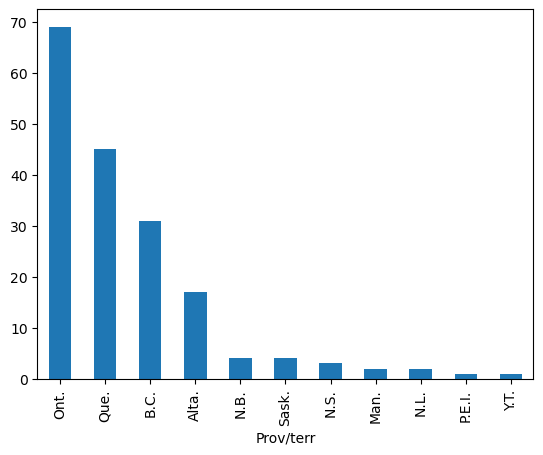

In [37]:
qual_dist.plot(kind = "bar")

pandas has a number of functions for **manipulating** DataFrames like this. <br>

<a class="anchor" id="rename"></a>
For example, the column names in this dataframe are lengthy. Let's rename these columns to something that's easier to work with.


In [38]:
# name_dictionary = {old_name : new_name, ...}
newNames = {'Name' : 'city',
           'Prov/terr' : 'prov',
           "Population, 2021": 'pop21',
           "Population, 2016" : 'pop16'}

df.rename(columns = newNames, inplace = True)

df

,city,prov,pop21,pop16
0,Abbotsford,B.C.,153524,141397
1,Airdrie,Alta.,74100,61581
2,Ajax,Ont.,126666,119677
3,Alma,Que.,30331,30771
4,Aurora,Ont.,62057,55445
...,...,...,...,...
174,Windsor,Ont.,229660,217188
175,Winnipeg,Man.,749607,705244
176,Wood Buffalo,Alta.,72326,71594
177,Woodstock,Ont.,46705,41098


Also, it looks like the data are are sorted by their name, but what if we wanted to sort by `pop21`? We can use the [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) function.

The default is to sort in ascending order, so we set this to be `False` (i.e. descending) so the most populous cities are at the top.

In [39]:
df.sort_values('pop21', ascending = False).head(5)

,city,prov,pop21,pop16
158,Toronto,Ont.,2794356,2731571
89,Montréal,Que.,1762949,1704694
19,Calgary,Alta.,1306784,1239220
106,Ottawa,Ont.,1017449,934243
42,Edmonton,Alta.,1010899,933088


<a class="anchor" id="filter"></a>
We can also easily filter the DataFrame. Let's show only municipalities in Ontario. 

In [40]:
df.loc[df["prov"] == "Ont."].sort_values('pop21', ascending = False).head(8)
# find rows in df where the Prov/terr value is "Ont"
# then sort the values by 2021 Population from high to low
# show the top 8 most populous cities

,city,prov,pop21,pop16
158,Toronto,Ont.,2794356,2731571
106,Ottawa,Ont.,1017449,934243
87,Mississauga,Ont.,717961,721599
11,Brampton,Ont.,656480,593638
56,Hamilton,Ont.,569353,536917
76,London,Ont.,422324,383822
81,Markham,Ont.,338503,328966
163,Vaughan,Ont.,323103,306233


Looks like their are only these 4! You can try filtering for other provinces. If you want to get a list of all the provinces in the dataset, we can run the `unique()` function on the series.

In [41]:
df["prov"].unique()

array(['B.C.', 'Alta.', 'Ont.', 'Que.', 'Man.', 'N.S.', 'P.E.I.', 'N.L.',
       'N.B.', 'Sask.', 'Y.T.'], dtype=object)

We can query by any of these 11. (There are no municipalities in Northwest Territories and Nunavut with a population greater than 25,000). 

We can also filter on more than one column, for example, let's try to find all the municipalities in Ontario that have a population greater than 500,000.

In [42]:
df.loc[(df["prov"] == "Ont.") & (df["pop21"] >= 500000)]

,city,prov,pop21,pop16
11,Brampton,Ont.,656480,593638
56,Hamilton,Ont.,569353,536917
87,Mississauga,Ont.,717961,721599
106,Ottawa,Ont.,1017449,934243
158,Toronto,Ont.,2794356,2731571


<a class="anchor" id="newcol"></a>
The DataFrame isn't static. We can add or delete columns as needed. Let's first add a column which shows the change in population between 2021 and 2016 and then sort by the cities that lost the most people.

In [43]:
df["popChange_1621"] = df["pop21"] - df["pop16"]
df.sort_values("popChange_1621").tail(5)

,city,prov,pop21,pop16,popChange_1621
158,Toronto,Ont.,2794356,2731571,62785
11,Brampton,Ont.,656480,593638,62842
19,Calgary,Alta.,1306784,1239220,67564
42,Edmonton,Alta.,1010899,933088,77811
106,Ottawa,Ont.,1017449,934243,83206


If we don't want to keep this column, we can just delete it as follows. If you run this cell more than once, i.e. after deleting it, you'll probably get an error saying there is nothing to delete. <br>

_Hint: Look at the bottom line of error message to find what is throwing the error_

In [44]:
del df["popChange_1621"]

<a class="anchor" id="aggsum"></a>

Another particularly useful function in pandas is to group by and summarize data. 

For example, if we want to simply count how many municipalities in each province there are in the dataset we can use the `groupby` and `size` functions.

We use the .reset_index() method to convert the resulting Series back to a DataFrame and give the resulting column a name of 'count'

In [45]:
df.groupby("prov").size().reset_index(name='count')

,prov,count
0,Alta.,17
1,B.C.,31
2,Man.,2
3,N.B.,4
4,N.L.,2
5,N.S.,3
6,Ont.,69
7,P.E.I.,1
8,Que.,45
9,Sask.,4


We can chain this to other filters, for example, how many cities in each province have a population greater than 500,000?

In [46]:
df.loc[df["pop21"] >= 500000].groupby("prov").size().reset_index(name='count')

,prov,count
0,Alta.,2
1,B.C.,2
2,Man.,1
3,Ont.,5
4,Que.,2


Great! Let's wrap by asking a bit more of an analytical question. 

What's the average percent change in population between 2016 and 2021 by province?

In [47]:
df["popChange_1621"] = 100 * (df["pop21"] - df["pop16"]) / df["pop16"]

dfa = df.groupby('prov')['popChange_1621'].mean().reset_index(name='avg').sort_values('avg')

dfa

,prov,avg
4,N.L.,2.614051
5,N.S.,3.738991
9,Sask.,4.321345
8,Que.,4.475347
2,Man.,5.630750
0,Alta.,6.849864
7,P.E.I.,7.522026
6,Ont.,8.008899
3,N.B.,8.054500
1,B.C.,8.739919


<a class="anchor" id="save"></a>
If we want, we can save this table to a local csv file if to share with others or use in another analysis. `index = False` means that only the two data variables are saved, not the index on the left.

In [48]:
# dfa.to_csv("avg_pop_change_by_prov.csv", index = False)

# Common Pandas Errors

In [49]:
df["PopChange_1621"]

KeyError: 'PopChange_1621'

In [ ]:
df.sort_values()

In [ ]:
df.loc['prov']

In [ ]:
newName2 = {'Name' : 'city_name'}

df.rename(columns = newName2)

df